1. Load the Dataset

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/sales_data_with_discounts.csv")

# View first few rows
df.head()


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


2. Identify Numerical Columns

In [2]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols


Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

3. Calculate Descriptive Statistics

In [3]:
mean_values = df[numerical_cols].mean()
median_values = df[numerical_cols].median()
mode_values = df[numerical_cols].mode().iloc[0]
std_values = df[numerical_cols].std()

stats_df = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values,
    'Standard Deviation': std_values
})

stats_df


,Mean,Median,Mode,Standard Deviation
Volume,5.066667,4.000000,3.000000,4.231602
Avg Price,10453.433333,1450.000000,400.000000,18079.904840
Total Sales Value,33812.835556,5700.000000,24300.000000,50535.074173
Discount Rate (%),15.155242,16.577766,5.007822,4.220602
Discount Amount,3346.499424,988.933733,69.177942,4509.902963
Net Sales Value,30466.336131,4677.788059,326.974801,46358.656624


Data Visualization

Histograms (Numerical Columns)

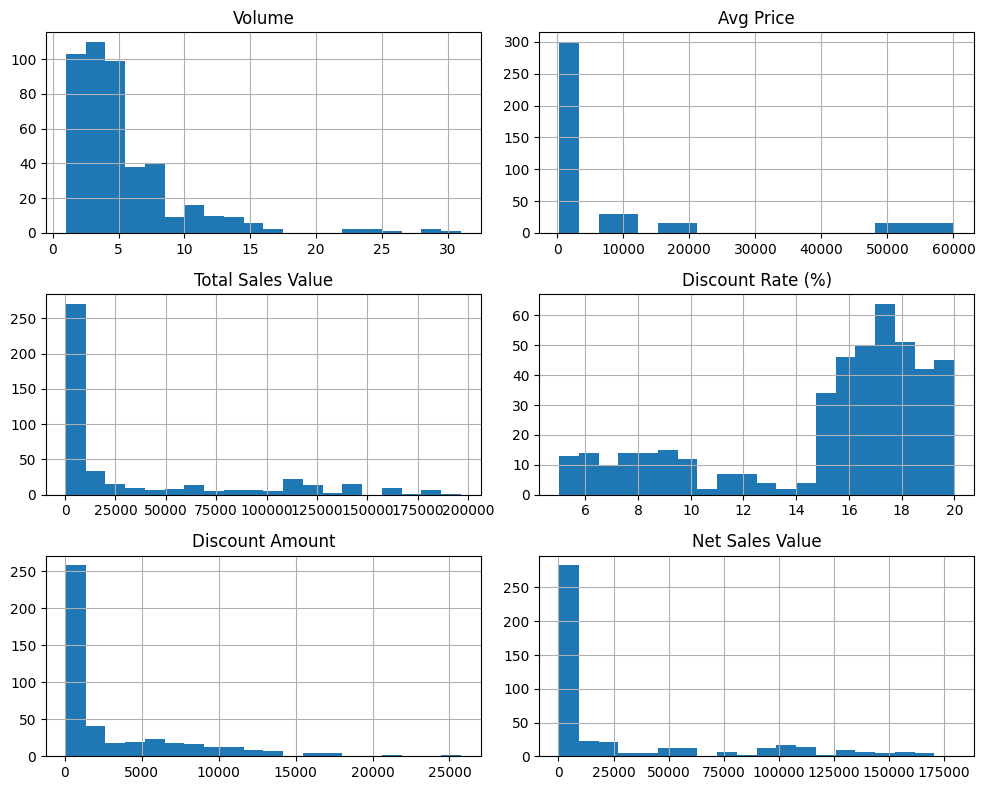

In [4]:
import matplotlib.pyplot as plt

df[numerical_cols].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()


Box Plots (Outlier Detection)

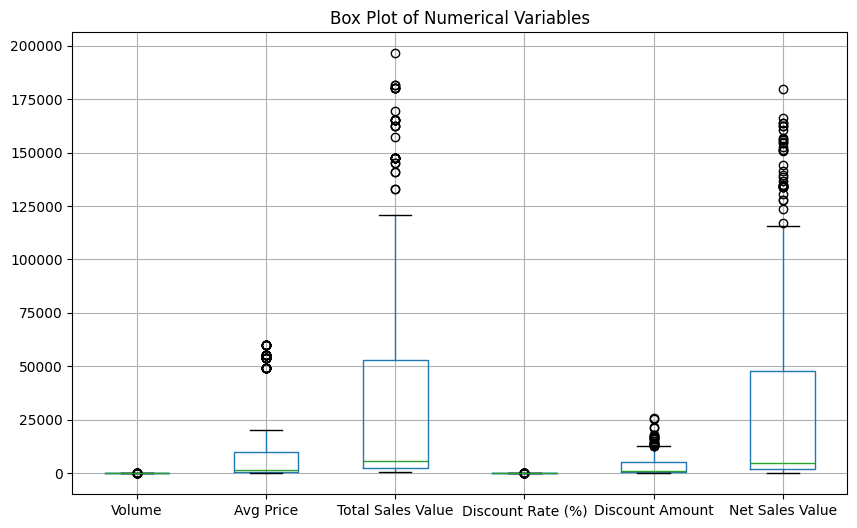

In [5]:
plt.figure(figsize=(10, 6))
df[numerical_cols].boxplot()
plt.title("Box Plot of Numerical Variables")
plt.show()


Bar Chart Analysis for Categorical Columns

In [6]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols


Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

Bar Chart Visualization

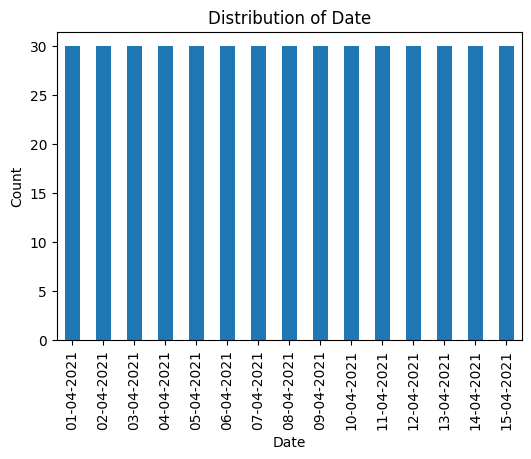

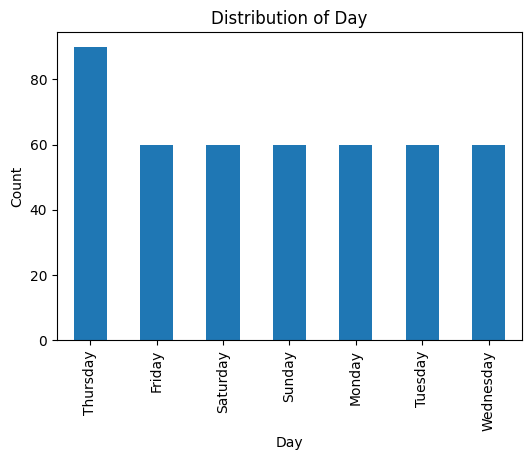

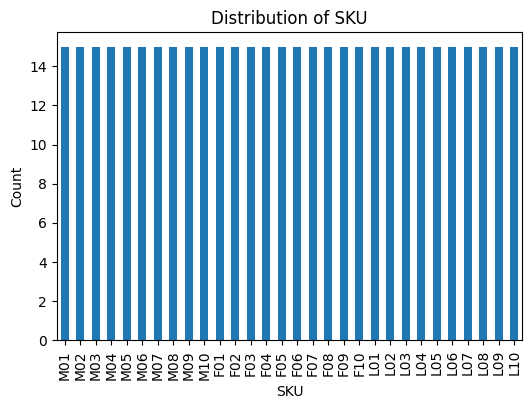

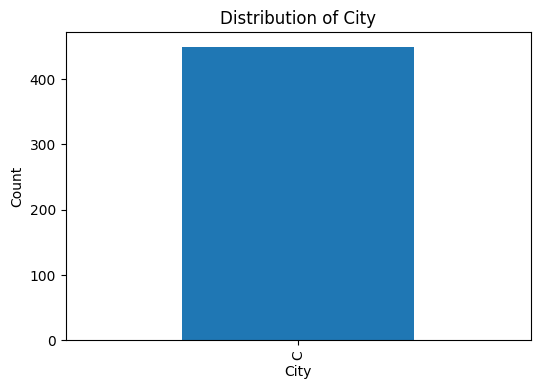

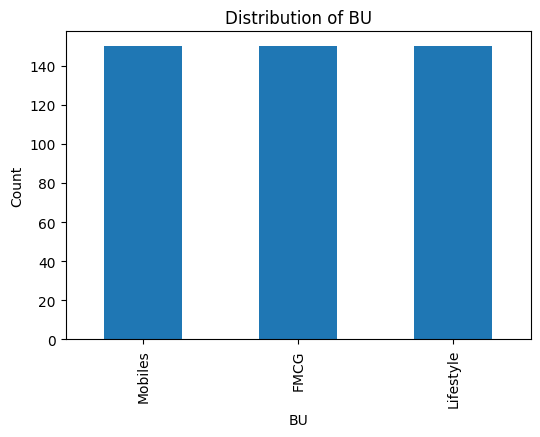

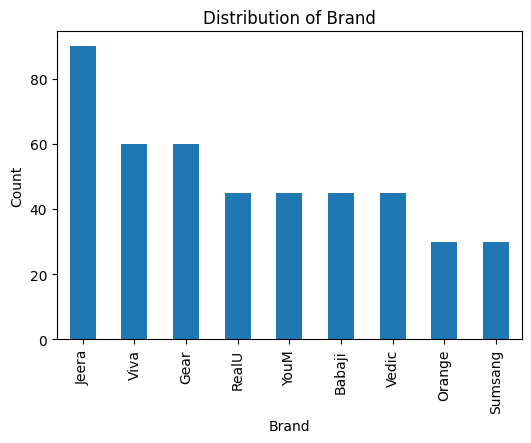

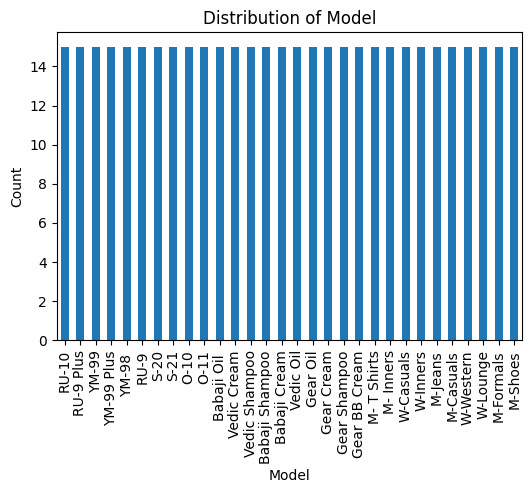

In [7]:
for col in categorical_cols:
    df[col].value_counts().plot(kind='bar', figsize=(6, 4))
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()
